# Retail Sales EDA
Analyze and explore patterns in retail sales dataset to understand distributions, relationships, and key insights.

The dataset used in this notebook has been cleaned in a previous notebook.

## Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("/content/retail_data_cleaned.csv")
df

,transaction_id,customer_id,category,item_id,item_category,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied
0,TXN_6867343,CUST_09,Patisserie,Item_10,PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17,MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12,BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16,BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,True
4,TXN_4575373,CUST_05,Food,Item_6,FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23,PAT,38.0,4,152.0,Credit Card,In-store,2023-09-03,True
12571,TXN_4009414,CUST_03,Beverages,Item_2,BEV,6.5,9,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7,BUT,14.0,10,140.0,Cash,Online,2024-08-24,True
12573,TXN_5167298,CUST_04,Furniture,Item_7,FUR,14.0,6,84.0,Cash,Online,2023-12-30,True


## Data Structure

### Checking the Shape
Amount of rows and columns.

In [81]:
# Shape
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 12575
Columns: 12


### Checking for correct column headers:
Check that there are no,

*   whitespaces
*   captial letters



In [82]:
# Column Headers
print("Column Headers:")
df.columns.to_list()

Column Headers:


['transaction_id',
 'customer_id',
 'category',
 'item_id',
 'item_category',
 'price_per_unit',
 'quantity',
 'total_spent',
 'payment_method',
 'location',
 'transaction_date',
 'discount_applied']

### Examine dataframe information  
Check for any missing values and incorrect data types.

In [83]:
# Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    12575 non-null  object 
 1   customer_id       12575 non-null  object 
 2   category          12575 non-null  object 
 3   item_id           12575 non-null  object 
 4   item_category     12575 non-null  object 
 5   price_per_unit    12575 non-null  float64
 6   quantity          12575 non-null  int64  
 7   total_spent       12575 non-null  float64
 8   payment_method    12575 non-null  object 
 9   location          12575 non-null  object 
 10  transaction_date  12575 non-null  object 
 11  discount_applied  12575 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 1.1+ MB


## Data Conversion
Fix incorrect data types.

In [84]:
# Convert categorical columns to 'category' data type
categorical_cols = ["category", "item_category", "payment_method", "location"]
df[categorical_cols]  = df[categorical_cols].astype("category")

# Convert 'quantity' to numeric
df["quantity"] = df["quantity"].astype(int)

# Convert 'transaction_date' to datetime
df["transaction_date"] = pd.to_datetime(df["transaction_date"], errors="coerce")

##  Preview the Data
View rows from the beginning, end, and a random sample to understand the structure. Check for typos, inconsistent formatting, or unusual values.

In [85]:
# Head
df.head()

,transaction_id,customer_id,category,item_id,item_category,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied
0,TXN_6867343,CUST_09,Patisserie,Item_10,PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17,MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12,BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16,BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,True
4,TXN_4575373,CUST_05,Food,Item_6,FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,False


In [86]:
# Tail
df.tail()

,transaction_id,customer_id,category,item_id,item_category,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied
12570,TXN_9347481,CUST_18,Patisserie,Item_23,PAT,38.0,4,152.0,Credit Card,In-store,2023-09-03,True
12571,TXN_4009414,CUST_03,Beverages,Item_2,BEV,6.5,9,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7,BUT,14.0,10,140.0,Cash,Online,2024-08-24,True
12573,TXN_5167298,CUST_04,Furniture,Item_7,FUR,14.0,6,84.0,Cash,Online,2023-12-30,True
12574,TXN_2407494,CUST_23,Food,Item_9,FOOD,17.0,3,51.0,Cash,Online,2022-08-06,True


In [87]:
# Random Sample
df.sample(5)

,transaction_id,customer_id,category,item_id,item_category,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied
8381,TXN_6172739,CUST_03,Beverages,Unknown,Unknown,8.0,6,48.0,Credit Card,In-store,2023-09-12,False
3084,TXN_3345761,CUST_17,Furniture,Item_20,FUR,33.5,6,201.0,Credit Card,Online,2024-09-18,False
3001,TXN_2046485,CUST_10,Patisserie,Item_14,PAT,24.5,3,73.5,Digital Wallet,In-store,2024-12-09,True
12128,TXN_1820052,CUST_09,Beverages,Item_18,BEV,30.5,6,183.0,Credit Card,Online,2023-09-05,True
6838,TXN_3300791,CUST_04,Butchers,Item_16,BUT,27.5,10,275.0,Cash,Online,2022-05-17,True


## Summary Statistics
Check mean, median, min/max, std...

In [88]:
# Statistics of numerical columns
df.describe()

,price_per_unit,quantity,total_spent,transaction_date
count,12575.000000,12575.000000,12575.000000,12575
mean,23.348191,5.558648,130.208111,2023-07-12 20:23:41.105368064
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00
25%,14.000000,3.000000,52.000000,2022-09-30 00:00:00
50%,23.000000,6.000000,110.000000,2023-07-13 00:00:00
75%,32.000000,8.000000,192.000000,2024-04-24 00:00:00
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00
std,10.480413,2.790160,93.580667,NaN


## Univariate Analysis
Analyze numerical and categorical variables.

### Numerical Variables
#### price_per_unit

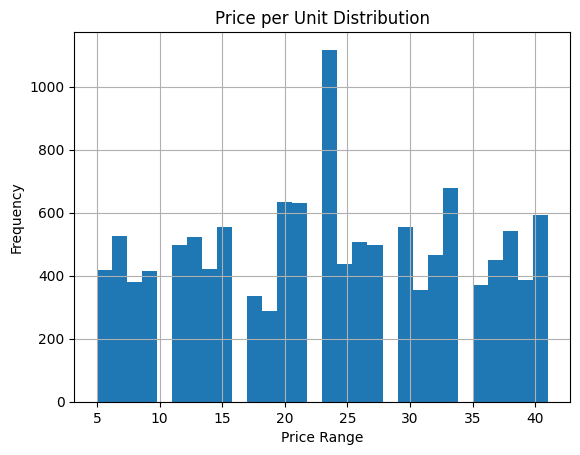

In [89]:
df["price_per_unit"].hist(bins=30)
plt.title("Price per Unit Distribution")
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.show()

#### quantity

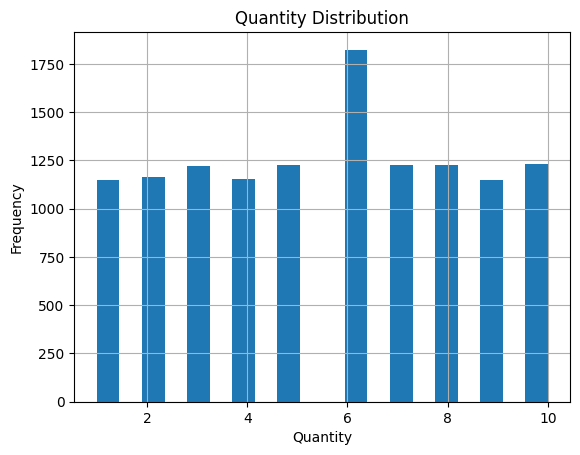

In [90]:
df["quantity"].hist(bins=20)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

#### total_spent

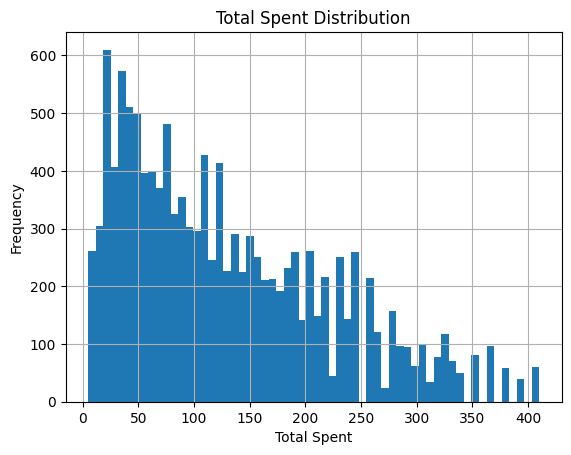

In [91]:
df["total_spent"].hist(bins=60)
plt.title("Total Spent Distribution")
plt.xlabel("Total Spent")
plt.ylabel("Frequency")
plt.show()

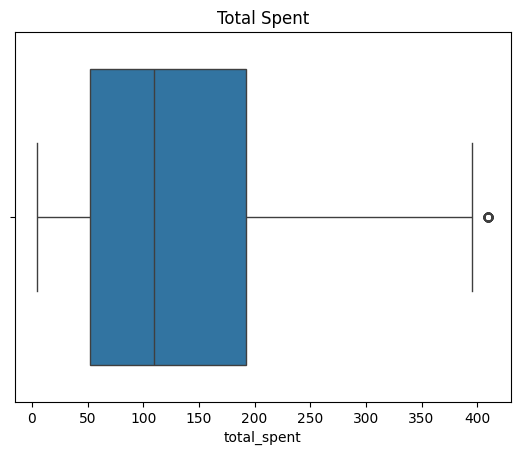

In [92]:
# Box Plot for Outlier visuals
sns.boxplot(x=df["total_spent"])
plt.title("Total Spent")
plt.show()

#### Correlation Analysis
View the correlation between price per unit, quantity, and total spent.

<Axes: >

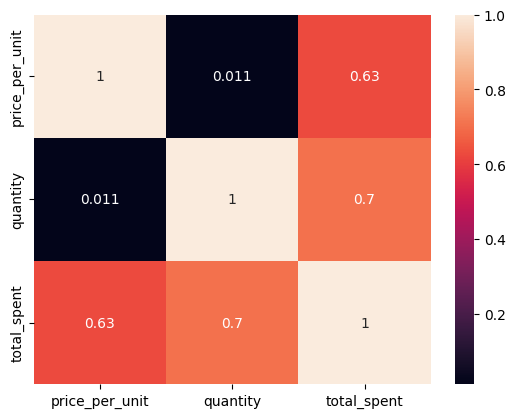

In [93]:
# Correlation Analysis
sns.heatmap(df[["price_per_unit","quantity","total_spent"]].corr(), annot=True)

### Categorical Columns
Check for imbalanced classes, rarity, and unexpected labels.

In [94]:
# Object columns
df.select_dtypes(include=["object", "category"]).columns.to_list()

['transaction_id',
 'customer_id',
 'category',
 'item_id',
 'item_category',
 'payment_method',
 'location']

#### ID Columns  
Check the ID columns: transaction_id, customer_id, item_id

In [95]:
# Check id columns for uniqueness
print(df["transaction_id"].is_unique)  # check for duplicate ids
print(df["customer_id"].nunique())  # check for number of distinct ids
print(df["item_id"].nunique())

True
25
26


#### category

In [96]:
# Value Counts
df["category"].value_counts()

,count
category,
Electric household essentials,1591
Furniture,1591
Food,1588
Milk Products,1584
Butchers,1568
Beverages,1567
Computers and electric accessories,1558
Patisserie,1528


In [97]:
# Distribution of values
df["category"].value_counts(normalize=True)

,proportion
category,
Electric household essentials,0.126521
Furniture,0.126521
Food,0.126282
Milk Products,0.125964
Butchers,0.124692
Beverages,0.124612
Computers and electric accessories,0.123897
Patisserie,0.121511


Text(0, 0.5, 'Frequency')

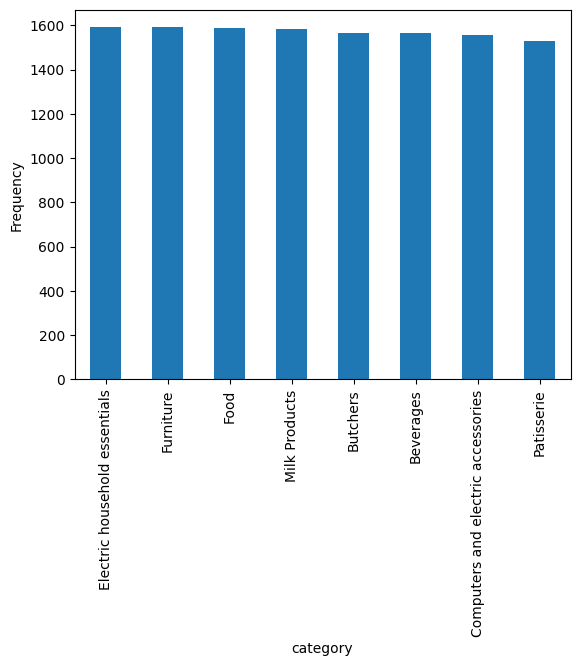

In [98]:
# Bar Plot Visualization
df["category"].value_counts().plot(kind="bar")
plt.ylabel("Frequency")

#### payment_method

In [99]:
# Value counts
df["payment_method"].value_counts()

,count
payment_method,
Cash,4310
Digital Wallet,4144
Credit Card,4121


In [100]:
# Proportion of each payment method
df["payment_method"].value_counts(normalize=True)

,proportion
payment_method,
Cash,0.342744
Digital Wallet,0.329543
Credit Card,0.327714


Text(0, 0.5, 'Frequency')

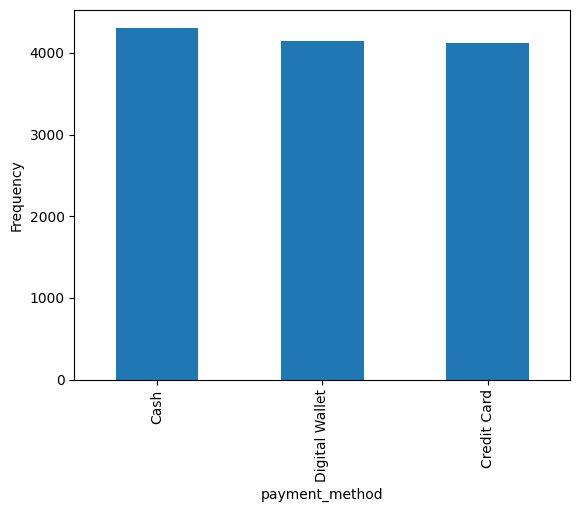

In [101]:
df["payment_method"].value_counts().plot(kind="bar")
plt.ylabel("Frequency")

#### location

In [102]:
# Check cardinality
df["location"].nunique()

2

Text(0, 0.5, 'Frequency')

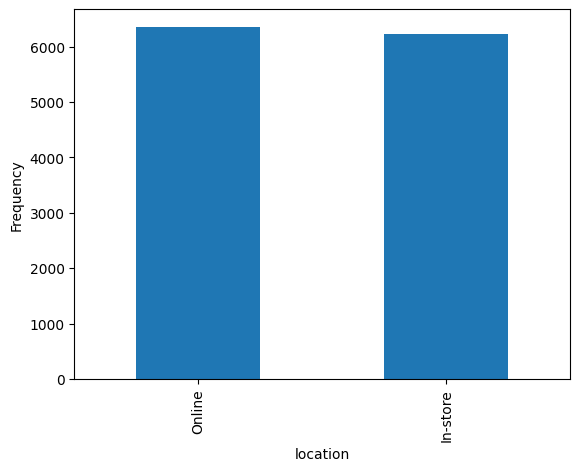

In [103]:
df["location"].value_counts().plot(kind="bar")
plt.ylabel("Frequency")

## Relationship Analysis  
View relationships between different columns.

### Numeric vs Numeric

#### quantity and total_spent

<Axes: xlabel='quantity', ylabel='total_spent'>

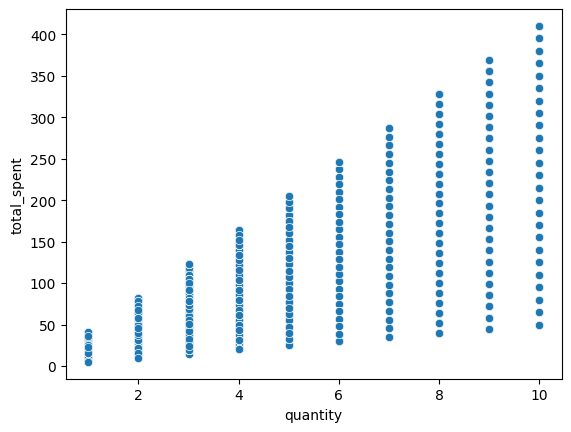

In [104]:
# quantity and total_spent
sns.scatterplot(x="quantity", y="total_spent", data=df)

#### price_per_unit and total_spent

<Axes: xlabel='price_per_unit', ylabel='total_spent'>

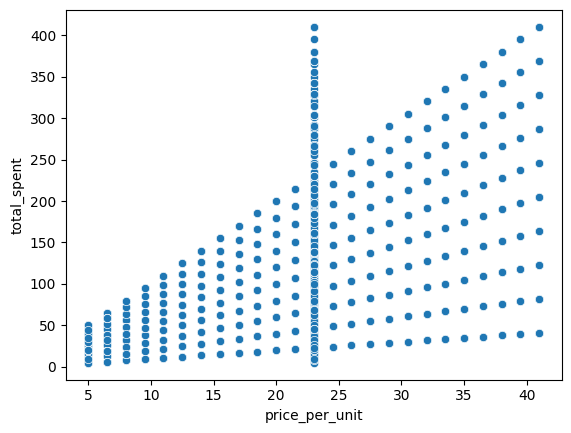

In [105]:
# price_per_unit and total_spent
sns.scatterplot(x="price_per_unit", y="total_spent", data=df)

In [106]:
# Check what price is most frequent
df["price_per_unit"].value_counts().head()

,count
price_per_unit,
23.0,1117
33.5,678
20.0,634
21.5,630
41.0,593


#### price_per_unit and quantity

<Axes: xlabel='quantity', ylabel='price_per_unit'>

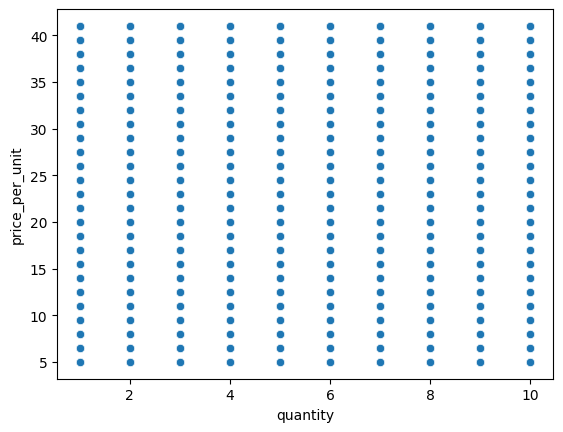

In [107]:
# price_per_unit and quantity
sns.scatterplot(x="quantity", y="price_per_unit", data=df)

### Categorical vs Numeric

#### category and total_spent

In [108]:
# category and total_spent
avg_spent = df.groupby("category")["total_spent"].mean().reset_index()
avg_spent

/tmp/ipython-input-3672698016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spent = df.groupby("category")["total_spent"].mean().reset_index()


,category,total_spent
0,Beverages,132.006701
1,Butchers,139.128189
2,Computers and electric accessories,129.668485
3,Electric household essentials,135.322124
4,Food,129.234887
5,Furniture,129.094909
6,Milk Products,119.881313
7,Patisserie,127.311191


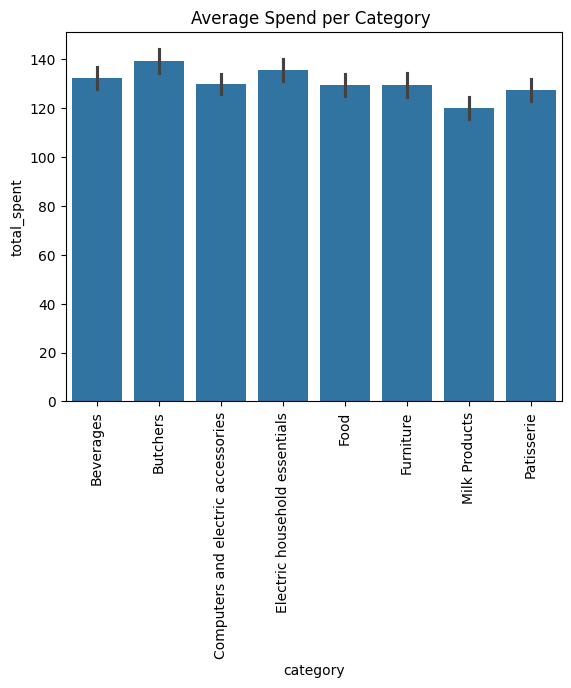

In [109]:
sns.barplot(x="category", y="total_spent", data=df)
plt.xticks(rotation=90)
plt.title("Average Spend per Category ")
plt.show()

#### payment_method and total_spent

In [110]:
# payment_method and total_spent
payment_total = df.groupby("payment_method")["total_spent"].sum().reset_index()
payment_total

/tmp/ipython-input-3739888120.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_total = df.groupby("payment_method")["total_spent"].sum().reset_index()


,payment_method,total_spent
0,Cash,567275.0
1,Credit Card,534475.0
2,Digital Wallet,535617.0


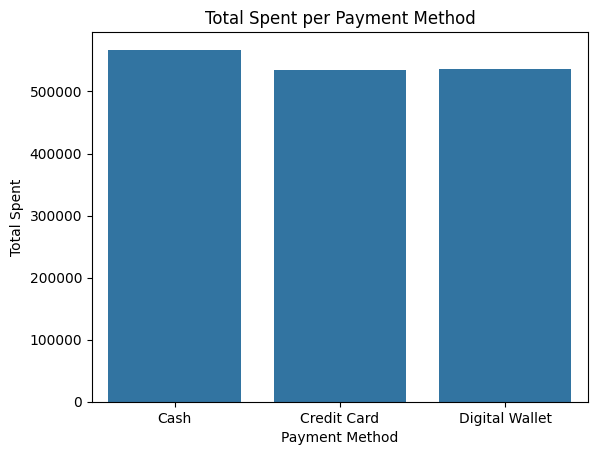

In [111]:
sns.barplot(x="payment_method", y="total_spent", data=payment_total)
plt.title("Total Spent per Payment Method")
plt.ylabel("Total Spent")
plt.xlabel("Payment Method")
plt.show()

#### location and total_spent

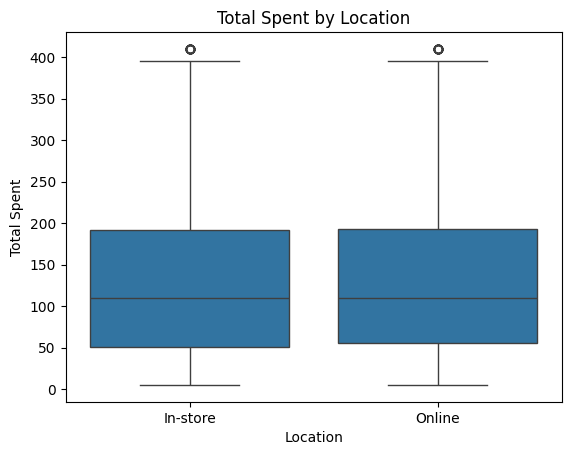

In [112]:
sns.boxplot(x="location", y="total_spent", data=df)
plt.title("Total Spent by Location")
plt.ylabel("Total Spent")
plt.xlabel("Location")
plt.show()


## Category vs Category

#### category and discount_applied

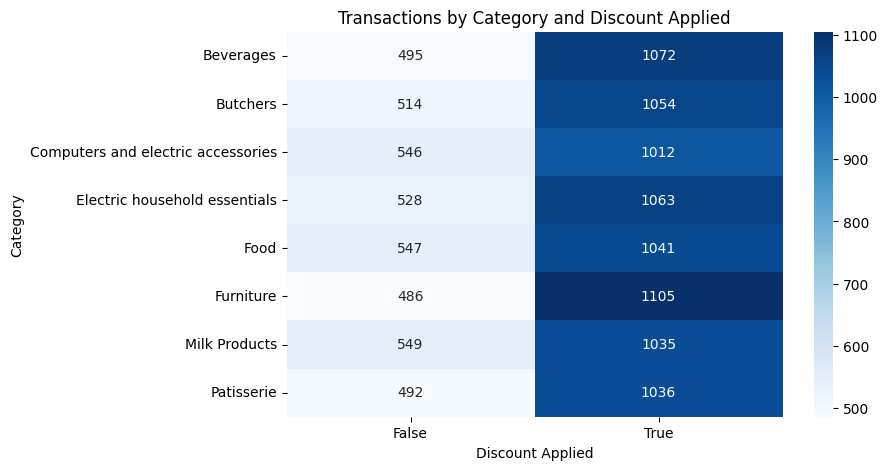

In [113]:
# category and discount_applied
cross_tab = pd.crosstab(df["category"], df["discount_applied"])

plt.figure(figsize=(8,5))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
plt.title("Transactions by Category and Discount Applied")
plt.ylabel("Category")
plt.xlabel("Discount Applied")
plt.show()

#### location and payment_method

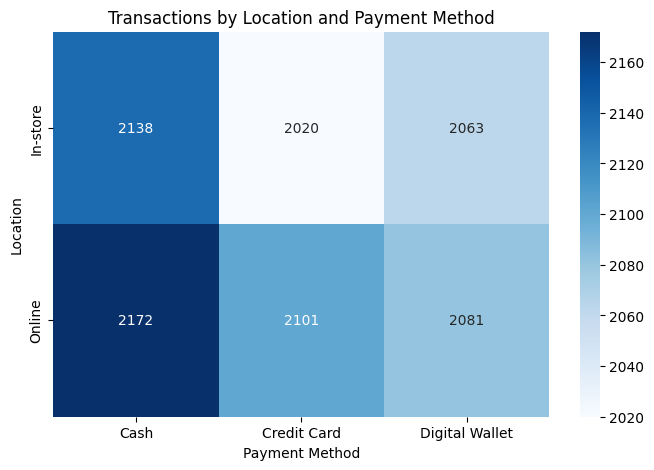

In [114]:
# location and payment_method
cross_tab = pd.crosstab(df["location"], df["payment_method"])

plt.figure(figsize=(8,5))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
plt.title("Transactions by Location and Payment Method")
plt.ylabel("Location")
plt.xlabel("Payment Method")
plt.show()

## DateTime vs Numeric

#### transaction_date and total_spent

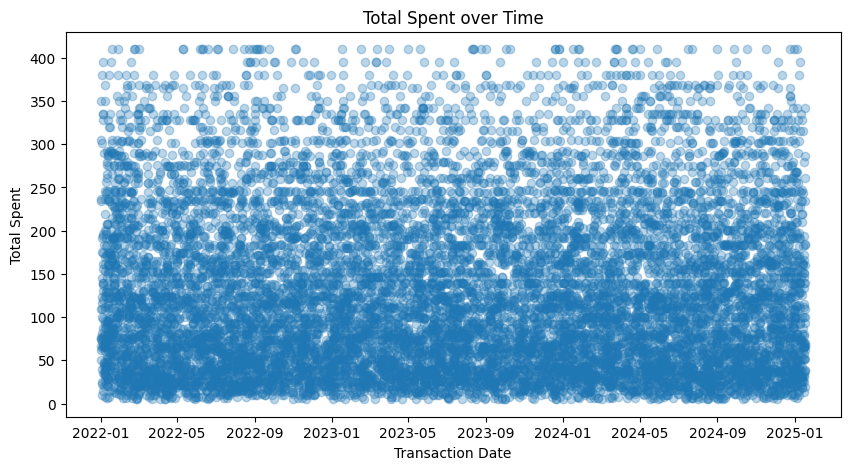

In [115]:
# total spent over time
plt.figure(figsize=(10,5))
plt.plot(df["transaction_date"], df["total_spent"], marker='o', linestyle='', alpha=0.3)
plt.title("Total Spent over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Total Spent")
plt.show()

#### Monthly Spending

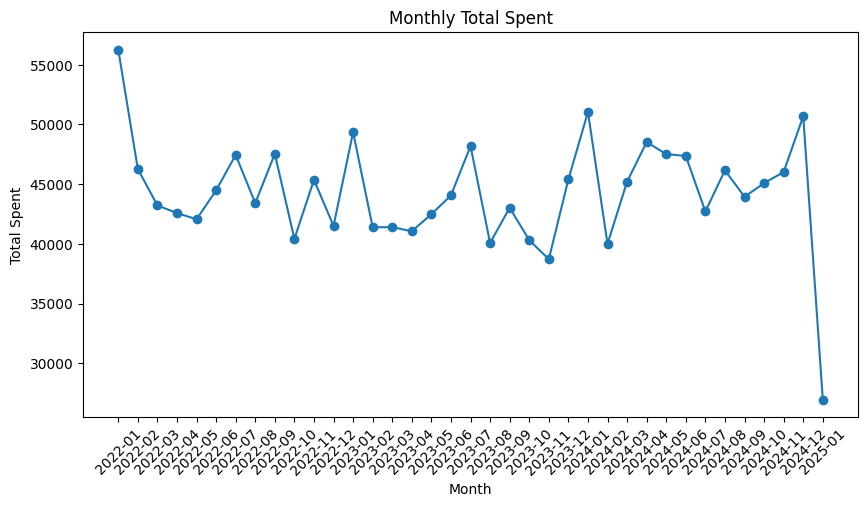

In [116]:
# Monthly spend
df["month"] = df["transaction_date"].dt.to_period("M")
monthly_total = df.groupby("month")["total_spent"].sum().reset_index()


plt.figure(figsize=(10,5))
plt.plot(monthly_total["month"].astype(str), monthly_total["total_spent"], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Total Spent")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.show()

# Summary

### **Overview**  

---
Rows and Columns:
1.  Number of observations: 12575
2.  Numbere of variables: 12

Data Types:

*   Object
*   float64
*   int54
*   bool

The variables {category, item_category, payment_method, location, and transaction_date} had *incorrect data* types. They were all changed to the correct data type.

The column headers were all in the correct format.

There were *no missing values*. No duplicate rows.


### **Univariate Analysis Findings**  

---


*Numerical Variables*: price_per_unit, quantity, and total_spent.

All followed a relatively normal distribution except for total_spent, which was *right-skewed* and contained one outlier.

Most customers had a quantity of 6 items.

Most items were priced close to 25 dollars.

---



*Categorical Variables*: transaction_id,      customer_id,
 category,
 item_id,
 item_category,
 payment_method,
 location.

 The variables that corresponded to identification {transaction_id, customer_id, item_id} were all unique.

 The item_category column was not analyzed because it corresponds with the category column.

 The other variables {category, payment_method, location} were analyzed.

All three of these variables had even distribution, with no dominating classes.





### **Bivariate Analysis**

---

***Numeric vs Numeric Variables***

There is *strong postive correlation* between quantity and total spent. There is a steady increase in total spent as quantity increases, which is expected.


There is a *postive correlation* between price_per_unit and total_spent. But, there is a *common price* of $24 with a wide range of total expenditure.

The graph for price_per_unit and quantity shows a *uniform pattern* across the whole graph.

This could happen because quantity is a *discrete variable* with only a small set of possible values. Price per unit values are mostly in increments of five, creating the uniform pattern.

---

***Categorical vs Numeric***

The average spend per catergory is *relatively the same* per catergory, with the most spend being in butchers and least in milk products.

Cash is the payment method with the *most spent*. With the other two being almost the same.

The in-store and online locations also had about the *same amount* of spendings.

---

***Category vs Category***

The amount of customers using discounts was about *double* the amount of those who were not across all categories.

Online and in-store locations saw the about 2000 customers for each payment method. This is an *issue* because cash payments were used for online shopping when it is expected to be either card or digital wallet.

---

***Datetime vs Numeric***

The total spent over time was *consistent* across the years. With the most spending amount to be under $150.

The monthly total spend was *extremely high* in January 2022, and fell for a few months before rising again. It follows a *fluctating pattern* of riuse and fall (while never reaching the all time high in January 2022), before *dropping sharply* in December of 2024.

### **Conclusion**

---



Categorical variables exhibit relatively uniform distribution, with no single category dominating the dataset.

The numerical variables, particularly those related to spending, show greater variability, indicating that differences in transaction behavior are primarily driven by numerical factors than categorical groupings.

**Several data quality issues were identified.**

Issues relating to incorrect *data types* were found and fixed.

Additionally, *inconsistencies* were observed between payment methods and location variables. Although cash appears to be the most frequently used method, the number of in-store and online transactions is approximately equal. Since online transactions should not allow cash payments, this discrepancy suggests potential data entry errors or misclassification within one or both variables.
